# Importieren der Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
from sklearn.preprocessing import LabelEncoder
import joblib

# Daten einlesen und überblick über die Daten

In [2]:
df = pd.read_csv ('C:/Users/kuimi/Documents/Master_Freiberg/Formation_Professionnelle/Data Sciences/Code_Souces/Projets_Portfolio/Classification_Sante/heart_disease_uci.csv')
df.shape 

(920, 16)

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
# Spalten mit mehr als 50 % fehlenden Werten löschen
df.drop(columns=['ca', 'thal'], inplace=True)

In [7]:
# Imputation der numerischen Spalten (Median)

for col in ['trestbps', 'chol', 'thalch', 'oldpeak']:
    df[col] = df[col].fillna(df[col].median())

In [17]:
# Imputation der kategorialen Spalten (Median)
for col in ['fbs', 'restecg', 'slope', 'exang']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [9]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'num'],
      dtype='object')

In [10]:
# Konvertiert die Zielvariable in Binärform.
# Hypothese: num > 0 => readmission (1), num == 0 => nicht readmis (0)

df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=['id', 'dataset', 'num'], inplace=True)

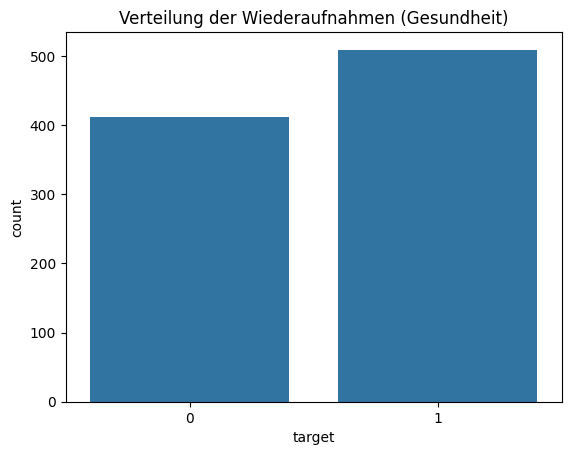

In [29]:
# Graphiques
sns.countplot(x='target', data=df)
plt.title("Verteilung der Wiederaufnahmen (Gesundheit)")
plt.show()

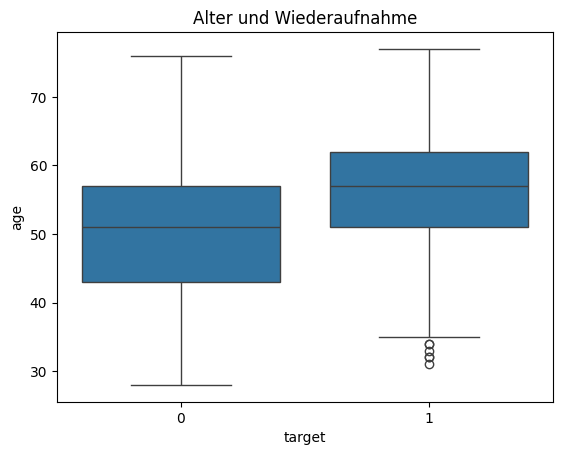

In [22]:
sns.boxplot(x='target', y='age', data=df)
plt.title("Alter und Wiederaufnahme")
plt.show()

# Vorbereitung der Daten

In [23]:
X = df.drop('target', axis=1)
y = df['target']

In [24]:
# Alle Spalten vom Typ object (Text) codieren
label_enc = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = label_enc.fit_transform(X[col])

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/z´test 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training

In [25]:
# logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Bewertung

In [26]:
print("===Logistic Regression Classification Report===")
print(classification_report(y_test, y_pred_lr))

print("===Random Forest Classification Report===")
print(classification_report(y_test, y_pred_rf))

===Logistic Regression Classification Report===
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        75
           1       0.87      0.78      0.82       109

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184

===Random Forest Classification Report===
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        75
           1       0.88      0.83      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



# Speicherung des Modells

In [27]:
joblib.dump(rf, 'rf_model.joblib')

['rf_model.joblib']

In [28]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']